<a href="https://colab.research.google.com/github/eughappy/HomeWork/blob/hyperparameters/hw12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [15]:
df = fashion_mnist.load_data()

In [24]:
(train_x, train_y), (test_x, test_y) = df

In [25]:
train_images  = train_x / 255.0
test_images = test_x / 255.0

In [26]:
train_y = to_categorical(train_y, 10)
test_y = to_categorical(test_y, 10)

In [29]:
train_y.shape

(60000, 10)

In [50]:
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)),
                                    Dropout(0.2),
                                    Dense(256, activation='relu'),
                                    Dropout(0.2),
                                    Dense(128, activation='relu'),
                                    Dropout(0.2),
                                    Dense(64, activation='relu'),
                                    Dense(10, activation='softmax')])

In [51]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history = model.fit(train_x, train_y, epochs=15, batch_size=64, validation_data=(test_x, test_y), callbacks=[EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)])

Epoch 1/15
938/938 [==============================] - 10s 11ms/step - loss: 0.0781 - accuracy: 0.8339 - val_loss: 0.0720 - val_accuracy: 0.8519
Epoch 2/15
938/938 [==============================] - 8s 8ms/step - loss: 0.0773 - accuracy: 0.8366 - val_loss: 0.0697 - val_accuracy: 0.8565
Epoch 3/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0766 - accuracy: 0.8353 - val_loss: 0.0709 - val_accuracy: 0.8552
Epoch 4/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0757 - accuracy: 0.8389 - val_loss: 0.0720 - val_accuracy: 0.8566
Epoch 5/15
938/938 [==============================] - 8s 9ms/step - loss: 0.0743 - accuracy: 0.8426 - val_loss: 0.0723 - val_accuracy: 0.8509
Epoch 6/15
938/938 [==============================] - 14s 15ms/step - loss: 0.0734 - accuracy: 0.8447 - val_loss: 0.0682 - val_accuracy: 0.8627
Epoch 7/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0735 - accuracy: 0.8446 - val_loss: 0.0690 - val_accuracy: 0.8603

In [58]:
test_loss, test_accuracy = model.evaluate(test_x, test_y)
print("Фінальна точність на тестових даних:",test_accuracy," втрати:" , test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.8562
Фінальна точність на тестових даних: 0.8561999797821045  втрати: 0.0690968856215477


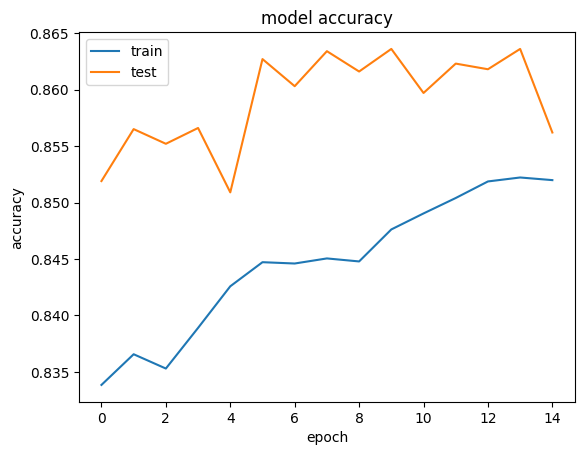

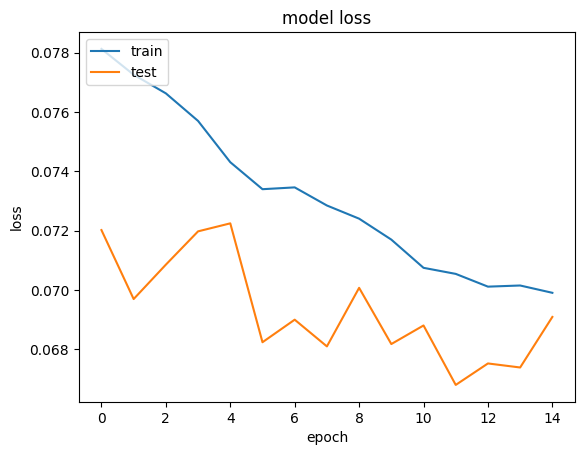

In [59]:
#accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()